### NBA Player Data Analysis

In [ ]:
import pandas as pd  

# requests api to get data from NBA site
import requests 

# to see all columns in a wide dataframe
pd.set_option('display.max_columns', None) 
import time
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [121]:
'''
Print this value to check query string values

data_url = 'https://stats.nba.com/stats/leagueLeaders?' \
           'LeagueID=00' \
           '&PerMode=Totals' \
           '&Scope=S' \
           '&Season=2021-22' \
           '&SeasonType=Regular' \
           'Season&StatCategory=PTS'
'''

data_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2021-22&SeasonType=Regular%20Season&StatCategory=PTS'
print(data_url)

https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2021-22&SeasonType=Regular%20Season&StatCategory=PTS


In [126]:
'''
    Create request object to get data in json format
'''
#r = requests.get(url=data_url).json()
# r['resultSet']['headers']
# r['parameters']
type(r)

dict

In [65]:
table_headers = r['resultSet']['headers']
table_rows = r['resultSet']['rowSet']

In [66]:
type(table_rows)

list

In [127]:
'''
    Create dataframe to data with columns and records
    Pass the list object and column names
'''
temp_df1 = pd.DataFrame(table_rows, columns=table_headers)

In [128]:
temp_df1.head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,24,983,201,472,0.426,77,196,0.393,136,170,0.800,24,137,161,148,29,21,100,72,615,569,1.48,0.29
1,201939,2,Stephen Curry,1610612744,GSW,22,764,202,440,0.459,91,229,0.397,107,129,0.829,11,104,115,129,29,8,57,59,602,566,2.26,0.51
2,1627759,3,Jaylen Brown,1610612738,BOS,24,920,197,419,0.470,60,161,0.373,100,131,0.763,33,133,166,85,27,10,74,71,554,515,1.15,0.36
3,1629029,4,Luka Doncic,1610612742,DAL,15,552,160,352,0.455,51,148,0.345,104,135,0.770,10,137,147,96,27,9,59,44,475,472,1.63,0.46
4,202710,5,Jimmy Butler,1610612748,MIA,17,629,166,328,0.506,23,68,0.338,111,132,0.841,41,84,125,78,35,11,25,25,466,507,3.12,1.40


In [129]:
'''
    Create dataframe with columns Year and Season type 
    Pass a dictionary object with column name and constant values
'''
# Create Season types list
Season_Types = ['Regular%20Season', 'Playoffs']

# Create years type list
Years = ['2019-20','2020-21','2021-22']

temp_df2 = pd.DataFrame({'Year' : ['2021-22' for i in range(len(temp_df1))],
                         'Season_Type' : ['Regular' for i in range(len(temp_df1))]})

In [130]:
temp_df2.head()

,Year,Season_Type
0,2021-22,Regular
1,2021-22,Regular
2,2021-22,Regular
3,2021-22,Regular
4,2021-22,Regular


In [71]:
# Concatenate both dataframes 
temp_df3 = pd.concat([temp_df2,temp_df1], axis = 1)
temp_df3.head()

,Year,Season_Type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2021-22,Regular,1629027,1,Trae Young,1610612737,ATL,76,2652,711,1544,0.460,233,610,0.382,500,553,0.904,50,234,284,737,72,7,303,128,2155,2066,2.43,0.24
1,2021-22,Regular,201942,2,DeMar DeRozan,1610612741,CHI,76,2743,774,1535,0.504,50,142,0.352,520,593,0.877,56,336,392,374,68,24,181,178,2118,1961,2.07,0.38
2,2021-22,Regular,203954,3,Joel Embiid,1610612755,PHI,68,2296,666,1334,0.499,93,251,0.371,654,803,0.814,146,650,796,284,77,99,214,181,2079,2304,1.33,0.36
3,2021-22,Regular,1628369,4,Jayson Tatum,1610612738,BOS,76,2731,708,1564,0.453,230,651,0.353,400,469,0.853,85,524,609,334,75,49,217,174,2046,1971,1.54,0.35
4,2021-22,Regular,203999,5,Nikola Jokic,1610612743,DEN,74,2476,764,1311,0.583,97,288,0.337,379,468,0.810,206,813,1019,584,109,63,281,191,2004,2862,2.08,0.39


In [72]:
headers = {
    'Accept': '*/*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
    'Host': 'stats.nba.com',
    'Origin': 'https://www.nba.com',
    'Referer': 'https://www.nba.com/',
    'sec-ch-ua': '"Not?A_Brand";v="8", "Chromium";v="108", "Google Chrome";v="108"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-site',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

In [131]:
# Create a dataframe columns
df_cols = ['Year','SeasonType']+table_headers

# Create your DATAFRAME
df = pd.DataFrame(columns=df_cols)

# Create Season types list
Season_Types = ['Regular%20Season', 'Playoffs']

# Create years type list
Years = ['2019-20','2020-21','2021-22']

# Nested loop for each year with two season types 
for y in Years:
    for s in Season_Types:
        
        # get data dynamically for each season and season type
        api_url = 'https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season='+y+'&SeasonType='+s+'&StatCategory=PTS'
        r = requests.get(url=api_url, headers=headers).json()
        
        # static column heirarchy inside json to pull data
        table_headers = r['resultSet']['headers']
        table_rows = r['resultSet']['rowSet']
        
        temp_df1 = pd.DataFrame(table_rows, columns=table_headers)
        temp_df2 = pd.DataFrame(
                                {'Year':[y for i in range(len(temp_df1))],
                                 'SeasonType':[s for i in range(len(temp_df1))]
                                }
                               )
        temp_df3 = pd.concat([temp_df2, temp_df1], axis=1)
        
        # Concatenate three dataframes into one workable dataframe
        df = pd.concat([df, temp_df3], axis=0)
        print(f'finished scrapping for {y}  {s}.')
        # time.sleep(20)
        
        
        
        
        
        

finished scrapping for 2019-20  Regular%20Season.
finished scrapping for 2019-20  Playoffs.
finished scrapping for 2020-21  Regular%20Season.
finished scrapping for 2020-21  Playoffs.
finished scrapping for 2021-22  Regular%20Season.
finished scrapping for 2021-22  Playoffs.


In [74]:
df.to_excel('nba_player_data.xlsx', index=False)

In [138]:
data = pd.read_excel('nba_player_data.xlsx')

In [139]:
data.head()


,Year,SeasonType,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2019-20,Regular%20Season,201935,1,James Harden,1610612745,HOU,68,2483,672,1514,0.444,299,843,0.355,692,800,0.865,70,376,446,512,125,60,308,227,2335,2220,1.66,0.41
1,2019-20,Regular%20Season,203081,2,Damian Lillard,1610612757,POR,66,2474,624,1349,0.463,270,674,0.401,460,518,0.888,33,251,284,530,70,22,194,114,1978,1907,2.73,0.36
2,2019-20,Regular%20Season,1626164,3,Devin Booker,1610612756,PHX,70,2512,627,1283,0.489,141,398,0.354,468,509,0.919,29,268,297,456,49,18,264,213,1863,1722,1.73,0.19
3,2019-20,Regular%20Season,203507,4,Giannis Antetokounmpo,1610612749,MIL,63,1917,685,1238,0.553,89,293,0.304,398,629,0.633,140,716,856,354,61,66,230,195,1857,2180,1.54,0.27
4,2019-20,Regular%20Season,1629027,5,Trae Young,1610612737,ATL,60,2120,546,1249,0.437,205,568,0.361,481,559,0.860,32,223,255,560,65,8,289,104,1778,1596,1.94,0.23


DATA CLEANING

In [136]:
data.shape

(2347, 29)

In [140]:
# remove trivial columns 
data.drop(columns=['RANK', 'EFF'], inplace=True) 

In [141]:
# get season start year
data['SeasonStart']=data.Year.apply(lambda x: x[0:4]).astype(int)  

In [142]:
data['TEAM'].unique()

array(['HOU', 'POR', 'PHX', 'MIL', 'ATL', 'DAL', 'WAS', 'LAL', 'UTA',
       'BOS', 'LAC', 'CHI', 'SAS', 'NOP', 'DEN', 'PHI', 'SAC', 'TOR',
       'CLE', 'OKC', 'IND', 'BKN', 'NYK', 'ORL', 'MEM', 'GSW', 'MIA',
       'CHA', 'MIN', 'DET'], dtype=object)

In [143]:
data['SeasonType']=data['SeasonType'].apply(lambda x: x.replace('Regular%20Season', 'RS'))

In [153]:
data[data['PLAYER'] == 'Aaron Gordon']


,Year,SeasonType,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,SeasonStart
80,2019-20,RS,203932,Aaron Gordon,1610612753,ORL,62,2017,335,767,0.437,73,237,0.308,151,224,0.674,107,368,475,228,51,39,100,125,894,2.28,0.51,2019
901,2020-21,RS,203932,Aaron Gordon,1610612743,DEN,50,1384,231,499,0.463,59,176,0.335,97,149,0.651,77,207,284,161,33,34,97,89,618,1.66,0.34,2020
1339,2020-21,Playoffs,203932,Aaron Gordon,1610612743,DEN,10,299,43,99,0.434,9,23,0.391,16,25,0.640,21,33,54,20,5,3,14,23,111,1.43,0.36,2020
1588,2021-22,RS,203932,Aaron Gordon,1610612743,DEN,75,2375,434,834,0.520,87,260,0.335,171,230,0.743,125,314,439,188,44,44,133,148,1126,1.41,0.33,2021
2212,2021-22,Playoffs,203932,Aaron Gordon,1610612743,DEN,5,160,23,54,0.426,3,15,0.200,20,28,0.714,18,18,36,13,2,6,8,14,69,1.63,0.25,2021


In [145]:
# get regualr season dataframe
rs_df = data[data['SeasonType'] == 'RS']
playoffs_df = data[data['SeasonType'] == 'Playoffs']

In [146]:
data.columns

Index(['Year', 'SeasonType', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'SeasonStart'],
      dtype='object')

In [85]:
total_cols = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
              'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS']

Which Player stats are correlated?

In [147]:
data.corr(numeric_only=True)

,PLAYER_ID,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,SeasonStart
PLAYER_ID,1.000000,0.062374,-0.070859,-0.141167,-0.142317,-0.138216,-0.075999,-0.122621,-0.116010,-0.070587,-0.152929,-0.147363,-0.124394,-0.098678,-0.161212,-0.150186,-0.156763,-0.121434,-0.097889,-0.146967,-0.122486,-0.147984,-0.090712,0.015599,0.118081
TEAM_ID,0.062374,1.000000,0.030260,0.023886,0.018466,0.023379,-0.041708,0.006581,0.008812,-0.012154,0.014286,0.016180,-0.024276,0.019012,0.013719,0.015629,0.016896,0.029200,0.030876,0.011063,0.025205,0.016949,0.003511,-0.002804,-0.007194
GP,-0.070859,0.030260,1.000000,0.909254,0.787864,0.792914,0.239317,0.689767,0.712170,0.271154,0.625417,0.642548,0.371127,0.639932,0.783288,0.772777,0.658769,0.815618,0.600561,0.731172,0.892460,0.778368,0.187819,0.094020,0.027897
MIN,-0.141167,0.023886,0.909254,1.000000,0.931737,0.936778,0.214854,0.805212,0.824595,0.274804,0.783747,0.792368,0.362460,0.643682,0.868514,0.839183,0.801921,0.897222,0.618467,0.871347,0.917384,0.927596,0.189795,0.037683,0.018956
FGM,-0.142317,0.018466,0.787864,0.931737,1.000000,0.988188,0.221976,0.781028,0.797827,0.248620,0.892560,0.896439,0.325282,0.614601,0.858273,0.823521,0.827016,0.822407,0.579907,0.923337,0.832470,0.994764,0.137348,-0.049533,0.014183
FGA,-0.138216,0.023379,0.792914,0.936778,0.988188,1.000000,0.169212,0.840138,0.861608,0.270862,0.879040,0.874809,0.341742,0.537150,0.820734,0.773933,0.841277,0.833696,0.520337,0.924512,0.819895,0.991162,0.156976,-0.041871,0.013946
FG_PCT,-0.075999,-0.041708,0.239317,0.214854,0.221976,0.169212,1.000000,0.046175,0.036748,0.237445,0.182881,0.206489,0.228326,0.345266,0.271669,0.301112,0.123482,0.174292,0.301661,0.179619,0.265568,0.201676,0.059861,0.084925,-0.000352
FG3M,-0.122621,0.006581,0.689767,0.805212,0.781028,0.840138,0.046175,1.000000,0.992171,0.359086,0.628923,0.595347,0.342722,0.215616,0.573522,0.497957,0.670284,0.702210,0.282340,0.704915,0.653044,0.813658,0.176258,0.020961,0.017865
FG3A,-0.116010,0.008812,0.712170,0.824595,0.797827,0.861608,0.036748,0.992171,1.000000,0.340873,0.654742,0.624270,0.348259,0.234230,0.595611,0.519902,0.695952,0.727301,0.302417,0.734424,0.676543,0.829765,0.180192,0.020744,0.023287
FG3_PCT,-0.070587,-0.012154,0.271154,0.274804,0.248620,0.270862,0.237445,0.359086,0.340873,1.000000,0.178129,0.158516,0.333767,0.011652,0.164425,0.129301,0.217590,0.239465,0.048371,0.212787,0.223984,0.259990,0.269571,0.135683,-0.039702


In [154]:
data[data['PLAYER'] == 'Aaron Gordon']

,Year,SeasonType,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,SeasonStart
80,2019-20,RS,203932,Aaron Gordon,1610612753,ORL,62,2017,335,767,0.437,73,237,0.308,151,224,0.674,107,368,475,228,51,39,100,125,894,2.28,0.51,2019
901,2020-21,RS,203932,Aaron Gordon,1610612743,DEN,50,1384,231,499,0.463,59,176,0.335,97,149,0.651,77,207,284,161,33,34,97,89,618,1.66,0.34,2020
1339,2020-21,Playoffs,203932,Aaron Gordon,1610612743,DEN,10,299,43,99,0.434,9,23,0.391,16,25,0.640,21,33,54,20,5,3,14,23,111,1.43,0.36,2020
1588,2021-22,RS,203932,Aaron Gordon,1610612743,DEN,75,2375,434,834,0.520,87,260,0.335,171,230,0.743,125,314,439,188,44,44,133,148,1126,1.41,0.33,2021
2212,2021-22,Playoffs,203932,Aaron Gordon,1610612743,DEN,5,160,23,54,0.426,3,15,0.200,20,28,0.714,18,18,36,13,2,6,8,14,69,1.63,0.25,2021


In [155]:
data_per_min=data.groupby(['PLAYER', 'PLAYER_ID', 'Year'])[total_cols].sum().reset_index()
data_per_min
#[total_cols]
# divide all the total column values with minutes played
for col in data_per_min.columns[4:]:
    data_per_min[col]=data_per_min[col]/data_per_min['MIN']
    

In [156]:
data_per_min.head()

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,203932,2019-20,2017,0.166088,0.380268,0.000217,0.036192,0.117501,0.000153,0.074864,0.111056,0.053049,0.182449,0.235498,0.113039,0.025285,0.019336,0.049579,0.061973,0.443233
1,Aaron Gordon,203932,2020-21,1683,0.162805,0.355318,0.000533,0.040404,0.118241,0.000431,0.067142,0.103387,0.058229,0.142602,0.200832,0.107546,0.022579,0.021985,0.065954,0.066548,0.433155
2,Aaron Gordon,203932,2021-22,2535,0.180276,0.350296,0.000373,0.035503,0.108481,0.000211,0.075345,0.101775,0.056410,0.130966,0.187377,0.079290,0.018146,0.019724,0.055621,0.063905,0.471400
3,Aaron Henry,1630565,2021-22,17,0.058824,0.294118,0.011765,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.117647,0.117647,0.117647,0.117647
4,Aaron Holiday,1628988,2019-20,1689,0.145056,0.345767,0.000583,0.053878,0.136175,0.000496,0.045589,0.054470,0.013618,0.081705,0.095323,0.139136,0.034932,0.009473,0.054470,0.076969,0.389580


In [157]:
data_per_min['FG%']=data_per_min['FGM']/data_per_min['FGA']
data_per_min['3PT%']=data_per_min['FG3M']/data_per_min['FG3A']
data_per_min['FT%']=data_per_min['FTM']/data_per_min['FTA']
data_per_min['FG3A%']=data_per_min['FG3A']/data_per_min['FGA']
data_per_min['PTS/FGA']=data_per_min['PTS']/data_per_min['FGA']
data_per_min['FG3M/FGM']=data_per_min['FG3M']/data_per_min['FGM']
data_per_min['FTA/FGA']=data_per_min['FTA']/data_per_min['FGA']
data_per_min['TRU%']=0.5*data_per_min['PTS']/data_per_min['FGA']+0.475*data_per_min['FTA']
data_per_min['AST_TOV']=data_per_min['AST']/data_per_min['TOV']

data_per_min.head()

,PLAYER,PLAYER_ID,Year,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,Aaron Gordon,203932,2019-20,2017,0.166088,0.380268,0.000217,0.036192,0.117501,0.000153,0.074864,0.111056,0.053049,0.182449,0.235498,0.113039,0.025285,0.019336,0.049579,0.061973,0.443233,0.436767,0.308017,0.674107,0.308996,1.165580,0.217910,0.292047,0.635542,2.280000
1,Aaron Gordon,203932,2020-21,1683,0.162805,0.355318,0.000533,0.040404,0.118241,0.000431,0.067142,0.103387,0.058229,0.142602,0.200832,0.107546,0.022579,0.021985,0.065954,0.066548,0.433155,0.458194,0.341709,0.649425,0.332776,1.219064,0.248175,0.290970,0.658641,1.630631
2,Aaron Gordon,203932,2021-22,2535,0.180276,0.350296,0.000373,0.035503,0.108481,0.000211,0.075345,0.101775,0.056410,0.130966,0.187377,0.079290,0.018146,0.019724,0.055621,0.063905,0.471400,0.514640,0.327273,0.740310,0.309685,1.345721,0.196937,0.290541,0.721204,1.425532
3,Aaron Henry,1630565,2021-22,17,0.058824,0.294118,0.011765,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.117647,0.117647,0.117647,0.117647,0.200000,0.000000,NaN,0.200000,0.400000,0.000000,0.000000,0.200000,0.000000
4,Aaron Holiday,1628988,2019-20,1689,0.145056,0.345767,0.000583,0.053878,0.136175,0.000496,0.045589,0.054470,0.013618,0.081705,0.095323,0.139136,0.034932,0.009473,0.054470,0.076969,0.389580,0.419521,0.395652,0.836957,0.393836,1.126712,0.371429,0.157534,0.589229,2.554348


In [158]:
data_per_min = data_per_min[data_per_min['MIN']>=50]

In [161]:
data_per_min.shape

(1512, 29)

In [159]:
data_per_min.drop(columns='PLAYER_ID', inplace=True)

In [160]:
data_per_min.corr(numeric_only=True)

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
MIN,1.000000,0.450545,0.378726,-0.576673,0.264435,0.174319,-0.443842,0.335381,0.266268,-0.147727,0.049438,-0.030123,0.278386,-0.000240,-0.087849,0.171094,-0.355127,0.484469,0.187233,0.229781,0.270325,0.016452,0.269357,0.040196,0.006701,0.291108,0.057312
FGM,0.450545,1.000000,0.862454,-0.193593,0.202515,0.145202,-0.181685,0.635111,0.602165,0.071209,0.248662,0.196147,0.274231,-0.048919,0.064554,0.460748,-0.160734,0.959683,0.403383,0.145083,0.192552,-0.294600,0.372552,-0.278110,0.106763,0.451035,-0.131602
FGA,0.378726,0.862454,1.000000,-0.197858,0.467435,0.495121,-0.095865,0.556554,0.479839,-0.251233,-0.014576,-0.116986,0.379978,-0.000595,-0.183022,0.463031,-0.313777,0.894236,-0.089519,0.167464,0.300450,0.029207,-0.044790,0.020166,-0.106966,0.060046,-0.018360
FG_PCT,-0.576673,-0.193593,-0.197858,1.000000,-0.198488,-0.155282,0.733815,-0.101609,-0.046915,0.119996,0.039907,0.077835,-0.172416,-0.000394,0.072865,-0.059548,0.238043,-0.214447,0.004224,-0.166904,-0.225469,-0.106143,-0.021100,-0.112537,0.145621,-0.028196,-0.018388
FG3M,0.264435,0.202515,0.467435,-0.198488,1.000000,0.950192,0.070069,-0.002923,-0.137045,-0.634806,-0.398179,-0.536448,0.113034,-0.043188,-0.435011,-0.052174,-0.418858,0.366024,-0.412838,0.546268,0.409114,0.803623,-0.150851,0.829573,-0.438684,-0.160534,0.138186
FG3A,0.174319,0.145202,0.495121,-0.155282,0.950192,1.000000,0.075158,-0.021354,-0.152272,-0.673445,-0.432298,-0.575688,0.134948,-0.019150,-0.460462,-0.034763,-0.413357,0.307860,-0.563731,0.387575,0.383956,0.847409,-0.326428,0.813067,-0.474738,-0.317526,0.155156
FG3_PCT,-0.443842,-0.181685,-0.095865,0.733815,0.070069,0.075158,1.000000,-0.137665,-0.128274,-0.088417,-0.094983,-0.101062,-0.114757,-0.017088,-0.085378,-0.103708,0.061080,-0.157430,-0.179198,0.181336,-0.109182,0.142527,-0.143492,0.183116,-0.075161,-0.152272,0.067497
FTM,0.335381,0.635111,0.556554,-0.101609,-0.002923,-0.021354,-0.137665,1.000000,0.958446,0.081262,0.222296,0.182866,0.293372,-0.023519,0.070348,0.510522,-0.038216,0.753087,0.235273,0.006381,0.269328,-0.327540,0.499560,-0.317193,0.652430,0.636043,-0.126827
FTA,0.266268,0.602165,0.479839,-0.046915,-0.137045,-0.152272,-0.128274,0.958446,1.000000,0.213024,0.312823,0.299465,0.236829,-0.029408,0.173198,0.525551,0.053339,0.687645,0.310205,-0.070731,0.026216,-0.441405,0.522455,-0.426535,0.761832,0.664702,-0.181465
OREB,-0.147727,0.071209,-0.251233,0.119996,-0.634806,-0.673445,-0.088417,0.081262,0.213024,1.000000,0.656050,0.864258,-0.327198,-0.102213,0.605878,0.021872,0.491569,-0.063198,0.587983,-0.347361,-0.371638,-0.667235,0.392057,-0.629310,0.417853,0.387601,-0.335197


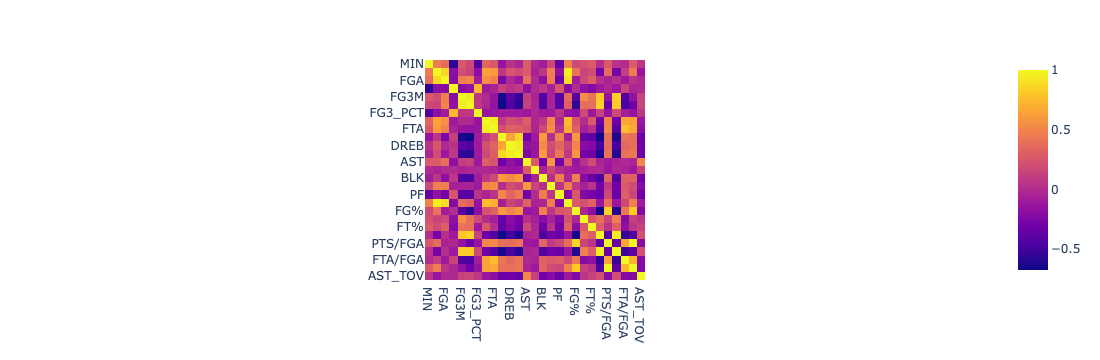

In [162]:
fig = px.imshow(data_per_min.corr(numeric_only=True))
fig.show()

How Are Minutes Played Distributed

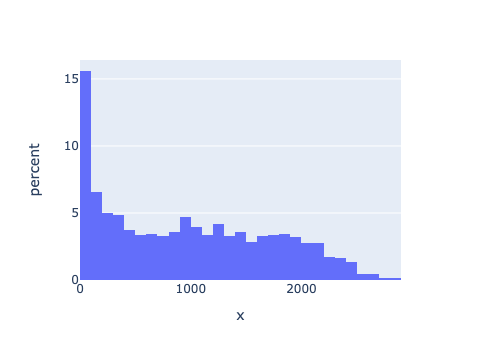

In [94]:
fig = px.histogram(x=rs_df['MIN'], histnorm='percent')
fig.show()

In [95]:
# Synatx to return all column values in row 0
rs_df.loc[1,:]

Year                  2019-20
SeasonType                 RS
PLAYER_ID              203081
PLAYER         Damian Lillard
TEAM_ID            1610612757
TEAM                      POR
GP                         66
MIN                      2474
FGM                       624
FGA                      1349
FG_PCT                  0.463
FG3M                      270
FG3A                      674
FG3_PCT                 0.401
FTM                       460
FTA                       518
FT_PCT                  0.888
OREB                       33
DREB                      251
REB                       284
AST                       530
STL                        70
BLK                        22
TOV                       194
PF                        114
PTS                      1978
AST_TOV                  2.73
STL_TOV                  0.36
SeasonStart              2019
Name: 1, dtype: object

In [96]:
# Synatx to return the top 3 rows with all columns
rs_df.loc[[0,1,2],:]

,Year,SeasonType,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,SeasonStart
0,2019-20,RS,201935,James Harden,1610612745,HOU,68,2483,672,1514,0.444,299,843,0.355,692,800,0.865,70,376,446,512,125,60,308,227,2335,1.66,0.41,2019
1,2019-20,RS,203081,Damian Lillard,1610612757,POR,66,2474,624,1349,0.463,270,674,0.401,460,518,0.888,33,251,284,530,70,22,194,114,1978,2.73,0.36,2019
2,2019-20,RS,1626164,Devin Booker,1610612756,PHX,70,2512,627,1283,0.489,141,398,0.354,468,509,0.919,29,268,297,456,49,18,264,213,1863,1.73,0.19,2019


In [97]:
# SYntax to return a range of rows with columns
rs_df.loc[0:9,:]

,Year,SeasonType,PLAYER_ID,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,SeasonStart
0,2019-20,RS,201935,James Harden,1610612745,HOU,68,2483,672,1514,0.444,299,843,0.355,692,800,0.865,70,376,446,512,125,60,308,227,2335,1.66,0.41,2019
1,2019-20,RS,203081,Damian Lillard,1610612757,POR,66,2474,624,1349,0.463,270,674,0.401,460,518,0.888,33,251,284,530,70,22,194,114,1978,2.73,0.36,2019
2,2019-20,RS,1626164,Devin Booker,1610612756,PHX,70,2512,627,1283,0.489,141,398,0.354,468,509,0.919,29,268,297,456,49,18,264,213,1863,1.73,0.19,2019
3,2019-20,RS,203507,Giannis Antetokounmpo,1610612749,MIL,63,1917,685,1238,0.553,89,293,0.304,398,629,0.633,140,716,856,354,61,66,230,195,1857,1.54,0.27,2019
4,2019-20,RS,1629027,Trae Young,1610612737,ATL,60,2120,546,1249,0.437,205,568,0.361,481,559,0.860,32,223,255,560,65,8,289,104,1778,1.94,0.23,2019
5,2019-20,RS,1629029,Luka Doncic,1610612742,DAL,61,2047,581,1255,0.463,171,541,0.316,426,562,0.758,78,495,573,538,62,14,260,153,1759,2.07,0.24,2019
6,2019-20,RS,203078,Bradley Beal,1610612764,WAS,57,2053,593,1303,0.455,170,481,0.353,385,457,0.842,52,190,242,347,71,23,194,126,1741,1.79,0.37,2019
7,2019-20,RS,2544,LeBron James,1610612747,LAL,67,2316,643,1303,0.493,148,425,0.348,264,381,0.693,66,459,525,684,78,36,261,118,1698,2.62,0.30,2019
8,2019-20,RS,1628378,Donovan Mitchell,1610612762,UTA,69,2364,602,1342,0.449,173,473,0.366,278,322,0.863,53,251,304,294,70,14,184,172,1655,1.60,0.38,2019
9,2019-20,RS,203076,Anthony Davis,1610612747,LAL,62,2131,551,1096,0.503,72,218,0.330,444,525,0.846,142,435,577,200,91,143,154,156,1618,1.30,0.59,2019


In [98]:
rs_df.loc[:,'PLAYER']

0                James Harden
1              Damian Lillard
2                Devin Booker
3       Giannis Antetokounmpo
4                  Trae Young
                ...          
2125              Nate Hinton
2126               Sam Dekker
2127           Trayvon Palmer
2128               Tyler Hall
2129           Zylan Cheatham
Name: PLAYER, Length: 1674, dtype: object

In [99]:
rs_df.loc[:,['PLAYER','TEAM']]

,PLAYER,TEAM
0,James Harden,HOU
1,Damian Lillard,POR
2,Devin Booker,PHX
3,Giannis Antetokounmpo,MIL
4,Trae Young,ATL
...,...,...
2125,Nate Hinton,IND
2126,Sam Dekker,TOR
2127,Trayvon Palmer,DET
2128,Tyler Hall,NYK


In [100]:
def hist_data(df=rs_df, min_MIN=0, min_GP=0):
    return df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'MIN']/\
    df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'GP']

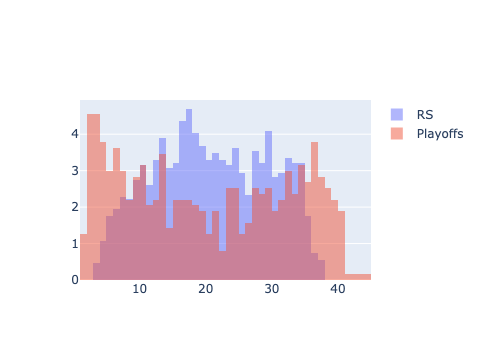

In [101]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=hist_data(rs_df,50,5), histnorm='percent', 
                           name='RS', xbins={'start':0, 'end':46,'size':1}))
fig.add_trace(go.Histogram(x=hist_data(playoffs_df,5,1),histnorm='percent',
                           name='Playoffs',xbins={'start':0, 'end':46,'size':1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()


In [102]:
# filter on the function and get mean
((hist_data(rs_df,50,5)>=12)&(hist_data(rs_df,50,5)<=34)).mean()

0.7560321715817694

How has the game changed over the past 10 years?

In [103]:
# group by based on required columns
change_df = data.groupby('SeasonStart')[total_cols].sum().reset_index()

# Measures per position
change_df['POSS_est']=change_df['FGA']-change_df['OREB']+change_df['TOV']+0.44*change_df['FTA']

# Change column order
change_df=change_df[list(change_df.columns[0:2])+['POSS_est']+list(change_df.columns[2:-1])]

change_df['FG%']=change_df['FGM']/change_df['FGA']
change_df['3PT%']=change_df['FG3M']/change_df['FG3A']
change_df['FT%']=change_df['FTM']/change_df['FTA']
change_df['AST%']=change_df['AST']/change_df['FGM']
change_df['FG3A%']=change_df['FG3A']/change_df['FGA']
change_df['PTS/FGA']=change_df['PTS']/change_df['FGM']
change_df['FG3M/FGM']=change_df['FG3M']/change_df['FGM']
change_df['FTA/FGA']=change_df['FTA']/change_df['FGA']
change_df['TRU%']=0.5*change_df['PTS']/(change_df['FGA']+0.475*change_df['FTA'])
change_df['AST_TOV']=change_df['AST']/change_df['TOV']

change_df

,SeasonStart,MIN,POSS_est,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2019,552262,234384.64,92997,202223,323.376,28032,78279,221.052,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,2.741755,0.301429,0.261622,0.560746,1.749882
1,2020,562518,235759.48,95849,205754,338.803,29549,80653,221.832,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,2.721687,0.308287,0.247465,0.567260,1.877818
2,2021,635572,264004.96,106569,231293,356.257,32733,92552,230.250,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,2.726975,0.307153,0.249506,0.561665,1.879960


In [107]:
# game time stats 48 minutes
change_per48_df = change_df.copy()
for col in change_per48_df.columns[2:18]:
    change_per48_df[col] = (change_per48_df[col]/change_per48_df['MIN'])*48*5
    
change_per48_df.drop(columns='MIN', inplace=True)

# fig = go.Figure()
# for col in change_per48_df.columns[1:]:
#     fig.add_trace(go.Scatter)

In [108]:
change_per48_df

,SeasonStart,POSS_est,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2019,101.858020,40.414296,87.881332,0.140532,12.182044,34.018202,0.096064,17.795467,22.991696,9.909210,34.469726,44.378936,24.095085,7.547722,4.817279,13.769551,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,2.741755,0.301429,0.261622,0.560746,1.749882
1,2020,100.587493,40.894265,87.785564,0.144551,12.607170,34.410846,0.094645,16.905699,21.723892,9.778034,34.196666,43.974699,24.451911,7.462588,4.809233,13.021450,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,2.721687,0.308287,0.247465,0.567260,1.877818
2,2021,99.691601,40.241798,87.339153,0.134527,12.360393,34.948802,0.086945,16.894388,21.791646,10.215176,33.834845,44.050021,24.400571,7.554518,4.677487,12.979301,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,2.726975,0.307153,0.249506,0.561665,1.879960


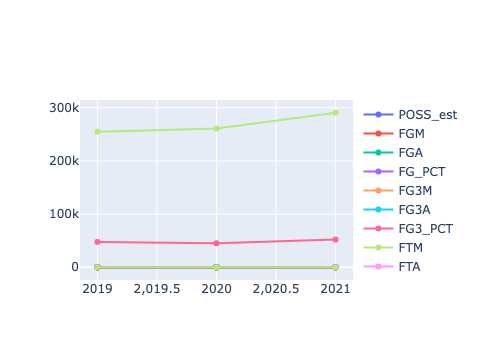

In [111]:
fig = go.Figure()
for col in change_per48_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per48_df['SeasonStart'],
                            y=change_per48_df[col],name=col))
fig.show()

In [114]:
change_per100_df = change_df.copy()
change_per100_df

for col in change_per100_df.columns[3:18]:
    change_per100_df[col]=(change_per100_df[col]/change_per100_df['POSS_est'])*100
    
change_per100_df.drop(columns=['MIN', 'POSS_est'], inplace=True)
change_per100_df

,SeasonStart,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2019,39.677088,86.278265,0.137968,11.959828,33.397666,0.094312,17.470855,22.572298,9.728453,33.840955,43.569408,23.655560,7.410042,4.729405,13.518377,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,2.741755,0.301429,0.261622,0.560746,1.749882
1,2020,40.655417,87.272843,0.143707,12.533536,34.209865,0.094093,16.806959,21.597011,9.720924,33.996936,43.717860,24.309097,7.419002,4.781144,12.945397,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,2.721687,0.308287,0.247465,0.567260,1.877818
2,2021,40.366287,87.609339,0.134943,12.398631,35.056917,0.087214,16.946651,21.859059,10.246777,33.939514,44.186291,24.476055,7.577888,4.691957,13.019452,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,2.726975,0.307153,0.249506,0.561665,1.879960


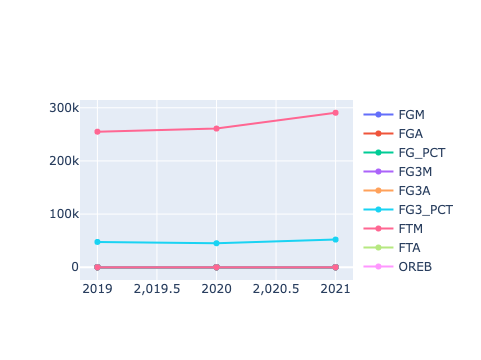

In [115]:
fig = go.Figure()
for col in change_per100_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per100_df['SeasonStart'],
                            y=change_per100_df[col],name=col))
fig.show()

Compare RS to Playoffs

In [117]:
rs_change_df= rs_df.groupby('SeasonStart')[total_cols].sum().reset_index()
playoff_change_df= playoffs_df.groupby('SeasonStart')[total_cols].sum().reset_index()


In [118]:
for i in [rs_change_df,playoff_change_df]:
    i['POSS_est'] = i['FGA']-i['OREB']+i['TOV']+0.44*i['FTA']
    i['POSS_per_48'] = (i['POSS_est']/i['MIN'])*48
    
    i['FG%']=i['FGM']/i['FGA']
    i['3PT%']=i['FG3M']/i['FG3A']
    i['FT%']=i['FTM']/i['FTA']
    i['AST%']=i['AST']/i['FGM']
    i['FG3A%']=i['FG3A']/i['FGA']
    i['PTS/FGA']=i['PTS']/i['FGA']
    i['FG3M/FGM']=i['FG3M']/i['FGM']
    i['FTA/FGA']=i['FTA']/i['FGA']
    i['TRU%']=0.5*i['PTS']/(i['FGA']+0.475*i['FTA'])
    i['AST_TOV']=i['AST']/i['TOV']
    
    for col in total_cols:
        i[col]=100*i[col]/i['POSS_est']
        
rs_change_df

,SeasonStart,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_est,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2019,235.129873,39.741774,86.378550,0.108107,11.875237,33.176460,0.072002,17.368831,22.473502,9.798838,33.803237,43.602075,23.716035,7.438668,4.765339,13.531948,20.205627,108.727615,217780.92,20.41425,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
1,2020,238.069848,40.637565,87.183600,0.110159,12.520406,34.156188,0.074413,16.730698,21.517093,9.692393,33.988197,43.680589,24.457861,7.466502,4.804198,13.041271,19.021868,110.526234,219058.40,20.16215,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
2,2021,240.309399,40.444286,87.713064,0.105761,12.383811,35.022979,0.069184,16.859678,21.766578,10.288949,33.966643,44.255592,24.540976,7.597520,4.692395,12.998590,19.550702,110.132061,247080.64,19.97425,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972


In [113]:
# Check for nulls 
df.isnull().sum()

Year          0
SeasonType    0
PLAYER_ID     0
RANK          0
PLAYER        0
TEAM_ID       0
TEAM          0
GP            0
MIN           0
FGM           0
FGA           0
FG_PCT        0
FG3M          0
FG3A          0
FG3_PCT       0
FTM           0
FTA           0
FT_PCT        0
OREB          0
DREB          0
REB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
EFF           0
AST_TOV       0
STL_TOV       0
dtype: int64

In [101]:
# Check columns
df.columns

Index(['Year', 'SeasonType', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM',
       'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV'],
      dtype='object')

In [103]:
cols = ['Year', 'SeasonType', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM',
       'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']

In [104]:
df[cols].dtypes

Year           object
SeasonType     object
PLAYER_ID      object
RANK           object
PLAYER         object
TEAM_ID        object
TEAM           object
GP             object
MIN            object
FGM            object
FGA            object
FG_PCT        float64
FG3M           object
FG3A           object
FG3_PCT       float64
FTM            object
FTA            object
FT_PCT        float64
OREB           object
DREB           object
REB            object
AST            object
STL            object
BLK            object
TOV            object
PF             object
PTS            object
EFF            object
AST_TOV       float64
STL_TOV       float64
dtype: object

In [ ]:
'''
FLOAT COLUMN DEFINITIONS

FG_PCT: Field Goal Percentage
FG3_PCT: 3-point Field Goal Percentage
CALCULATION: To calculate field goal percentage, divide the number of made shots by the 
             total number of shot attempts.
DEFINITION: Field goal percentage is used to measure how well a player or team shoots 
             the ball during a game. 

             
             
             
FT_PCT: Free throw Percentage
CALCULATION: FT% = Free Throws Made ÷ Free Throw Attempts

AST_TOV: Assist to Turnover Ratio
CALCULATION: AST/TO = Assists ÷ Turnovers
DEFINITION: Assist to turnover ratio puts a player’s assists in context with their turnovers.



STL_TOV: Steal/Turnover Ratio
CALCULATION: STL/TOV = Steals ÷ Turnovers
DEFINITION: STL/TOV ratio is a measurement of how often a player (or team) forces a change 
             of possession by the other team (steal) to how often they lose possession of the 
             ball (turnover).

             A higher STL/TOV means that the player (or team) frequently takes possession away 
             from the other team and rarely gives it up.
             
'''

In [110]:
df[cols].select_dtypes(float).describe()

,FG_PCT,FG3_PCT,FT_PCT,AST_TOV,STL_TOV
count,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000
mean,0.433931,0.286806,0.672260,1.642262,0.644337
std,0.144915,0.165590,0.275428,1.232089,0.589510
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.392000,0.222000,0.615000,0.965000,0.320000
50%,0.439000,0.333000,0.756000,1.500000,0.540000
75%,0.500000,0.382000,0.840000,2.180000,0.830000
max,1.000000,1.000000,1.000000,17.000000,8.000000


In [108]:
# Chaining
(df
 [cols]
 .select_dtypes(float)
 .describe()
)

,FG_PCT,FG3_PCT,FT_PCT,AST_TOV,STL_TOV
count,2347.000000,2347.000000,2347.000000,2347.000000,2347.000000
mean,0.433931,0.286806,0.672260,1.642262,0.644337
std,0.144915,0.165590,0.275428,1.232089,0.589510
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.392000,0.222000,0.615000,0.965000,0.320000
50%,0.439000,0.333000,0.756000,1.500000,0.540000
75%,0.500000,0.382000,0.840000,2.180000,0.830000
max,1.000000,1.000000,1.000000,17.000000,8.000000


In [111]:
# Analyze float columns
(df
 [cols]
 .select_dtypes(float)
)

,FG_PCT,FG3_PCT,FT_PCT,AST_TOV,STL_TOV
0,0.444,0.355,0.865,1.66,0.41
1,0.463,0.401,0.888,2.73,0.36
2,0.489,0.354,0.919,1.73,0.19
3,0.553,0.304,0.633,1.54,0.27
4,0.437,0.361,0.860,1.94,0.23
...,...,...,...,...,...
212,0.000,0.000,0.000,0.00,0.00
213,0.000,0.000,0.000,1.00,1.00
214,0.000,0.000,0.000,3.00,1.00
215,0.000,0.000,0.000,0.00,0.00


In [112]:
# Column summary
df.FG_PCT.describe()

count    2347.000000
mean        0.433931
std         0.144915
min         0.000000
25%         0.392000
50%         0.439000
75%         0.500000
max         1.000000
Name: FG_PCT, dtype: float64

In [114]:
(df
 [cols]
 .select_dtypes(object)
)

,Year,SeasonType,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF
0,2019-20,Regular%20Season,201935,1,James Harden,1610612745,HOU,68,2483,672,1514,299,843,692,800,70,376,446,512,125,60,308,227,2335,2220
1,2019-20,Regular%20Season,203081,2,Damian Lillard,1610612757,POR,66,2474,624,1349,270,674,460,518,33,251,284,530,70,22,194,114,1978,1907
2,2019-20,Regular%20Season,1626164,3,Devin Booker,1610612756,PHX,70,2512,627,1283,141,398,468,509,29,268,297,456,49,18,264,213,1863,1722
3,2019-20,Regular%20Season,203507,4,Giannis Antetokounmpo,1610612749,MIL,63,1917,685,1238,89,293,398,629,140,716,856,354,61,66,230,195,1857,2180
4,2019-20,Regular%20Season,1629027,5,Trae Young,1610612737,ATL,60,2120,546,1249,205,568,481,559,32,223,255,560,65,8,289,104,1778,1596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,2021-22,Playoffs,1629006,206,Josh Okogie,1610612750,MIN,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,2021-22,Playoffs,1630556,206,Kessler Edwards,1610612751,BKN,2,7,0,0,0,0,0,0,0,0,0,1,1,0,1,3,0,1
214,2021-22,Playoffs,1630201,206,Malachi Flynn,1610612761,TOR,6,36,0,7,0,3,0,0,2,1,3,3,1,0,1,6,0,-1
215,2021-22,Playoffs,202693,206,Markieff Morris,1610612748,MIA,2,3,0,1,0,0,0,0,0,1,1,0,0,0,1,2,0,-1
